In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.layers import Conv2D  ,MaxPooling2D,   Flatten  ,Dense  , Dropout
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path=r"C:\Users\hp laptop\Downloads\Shoes company\train"

In [3]:
dis=os.listdir(path)
dis

['adidas', 'nike']

In [4]:
dis.index('nike')

1

In [7]:
Data=[]
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(150,150))
        T=dis.index(i)
        Data.append([C,T])

In [8]:
i=r"C:\Users\hp laptop\Downloads\Shoes company\train\adidas\adidas_ (136).jpg"

In [9]:
k=cv.imread(i)
k

array([[[239, 237, 236],
        [239, 237, 236],
        [239, 237, 236],
        ...,
        [239, 237, 236],
        [239, 237, 236],
        [239, 237, 236]],

       [[239, 237, 236],
        [239, 237, 236],
        [239, 237, 236],
        ...,
        [239, 237, 236],
        [239, 237, 236],
        [239, 237, 236]],

       [[239, 237, 236],
        [239, 237, 236],
        [239, 237, 236],
        ...,
        [239, 237, 236],
        [239, 237, 236],
        [239, 237, 236]],

       ...,

       [[239, 237, 236],
        [239, 237, 236],
        [239, 237, 236],
        ...,
        [239, 237, 236],
        [239, 237, 236],
        [239, 237, 236]],

       [[239, 237, 236],
        [239, 237, 236],
        [239, 237, 236],
        ...,
        [239, 237, 236],
        [239, 237, 236],
        [239, 237, 236]],

       [[239, 237, 236],
        [239, 237, 236],
        [239, 237, 236],
        ...,
        [239, 237, 236],
        [239, 237, 236],
        [239, 237, 236]]

In [10]:
k.shape

(224, 224, 3)

In [11]:
Data[1]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [12]:
len(Data)

460

In [13]:
import random #for shuffle
random.shuffle(Data)

In [14]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [15]:
T1=pd.get_dummies(T).replace({True:1,False:0})
T1

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
455,0,1
456,0,1
457,0,1
458,1,0


In [16]:
F=np.array(F)

In [17]:
F1=F/255

In [18]:
F1[1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [19]:
F1.shape

(460, 150, 150, 3)

In [20]:
T1.shape

(460, 2)

In [21]:
T2=np.array(T1)

In [23]:
from keras.layers import Dense,Lambda,Input,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential

In [24]:
vgg=VGG16(input_shape=[150,150,3]
          ,weights='imagenet',
          include_top=False)

In [26]:
for i in vgg.layers:
    i.trainable=False

In [27]:
x=Flatten()(vgg.output)

In [28]:
z=Dense(1,activation='sigmoid')(x)

In [29]:
model=Model(vgg.input,z)

In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(F1,T2,epochs=5,validation_split=0.15,batch_size=15)

Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6670 - loss: 0.5725 - val_accuracy: 0.8406 - val_loss: 0.4096
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9192 - loss: 0.2523 - val_accuracy: 0.7971 - val_loss: 0.3955
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9397 - loss: 0.1854 - val_accuracy: 0.7101 - val_loss: 0.5029
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9390 - loss: 0.1624 - val_accuracy: 0.8841 - val_loss: 0.3472
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9894 - loss: 0.1010 - val_accuracy: 0.8841 - val_loss: 0.3325


In [41]:
test=r"C:\Users\hp laptop\Downloads\Shoes company\test\nike\Image_60.jpg"

In [42]:
A1=cv.imread(test)
A1

array([[[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]]

In [48]:
A2=cv.resize(A1,(150,150))

In [49]:
A3=np.reshape(A2,(1,150,150,3))

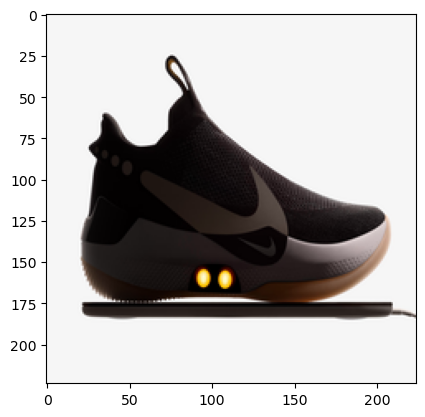

In [44]:
plt.imshow(A1)

In [50]:
pred=model.predict(A3)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


array([[1.6699426e-18, 1.0000000e+00]], dtype=float32)

In [51]:
np.argmax(pred)

1

In [61]:
dis[0]

'adidas'

In [60]:
pred[0][0]

1.6699426e-18

In [62]:
if pred[0][0]<0.5:
    print('adidas')
else:
    print('nike')

adidas


In [63]:
path_test=r"C:\Users\hp laptop\Downloads\Shoes company\test"

In [64]:
ct2=['adidas','nike']
Data1=[]
for i in ct2:
    A=os.path.join(path_test,i)
    #print(i)
    #print(A)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        #print(B)
        img=cv.imread(B)
        #print(img.shape)
        #plt.imshow(img)
        #plt.show()
        array=cv.resize(img,(150,150))
        #print(array.shape)
        #plt.imshow(array)
        #plt.show()
        labels=ct2.index(i)
        #print(labels)
        Data1.append([array,labels])

In [77]:
F=[]
T=[]
for i,j in Data1:
    F.append(i)
    T.append(j)

In [78]:
F=np.array(F)
T=np.array(T)

In [79]:
F=F/255

In [80]:
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
pred2=model.predict(F)
pred2

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step


array([[0.8604372 , 0.12512115],
       [0.7767747 , 0.10904977],
       [0.7875643 , 0.03835968],
       [0.8604372 , 0.12512115],
       [0.7767747 , 0.10904977],
       [0.7875643 , 0.03835968],
       [0.47242662, 0.34003338],
       [0.89078987, 0.04441612],
       [0.48471487, 0.38558364],
       [0.62427616, 0.31256768],
       [0.7069124 , 0.17223753],
       [0.24569029, 0.55262476],
       [0.50884706, 0.18453765],
       [0.36239   , 0.21836157],
       [0.7983718 , 0.11454779],
       [0.5276059 , 0.14988746],
       [0.5052552 , 0.5083289 ],
       [0.67280257, 0.10004465],
       [0.46580866, 0.28879222],
       [0.7261723 , 0.05054345],
       [0.6300849 , 0.20699702],
       [0.2570405 , 0.4050292 ],
       [0.662987  , 0.1264283 ],
       [0.7332164 , 0.22707586],
       [0.5558762 , 0.2873404 ],
       [0.8087705 , 0.11203903],
       [0.8160179 , 0.07441448],
       [0.30682886, 0.21165815],
       [0.3694624 , 0.24050042],
       [0.6808827 , 0.12652244],
       [0.

In [83]:
Final=[]
for i in pred2:
    Final.append(np.argmax(i))

In [84]:
Final

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [85]:
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(T,Final)


0.85

In [87]:
confusion_matrix(T,Final)

array([[27,  3],
       [ 6, 24]], dtype=int64)

In [88]:
print(classification_report(T,Final))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.80      0.84        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

